### Understand Basic Pytorch Optimization

In [2]:
from fastai.vision.all import *

In [17]:
# show predictions
def show_predictions(predictions):
    ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(predictions), color='red')

In [19]:
# now we also need a loss function
def mse(preds, targets): return ((preds-targets)**2).mean()

*Step 0: Data & Model*

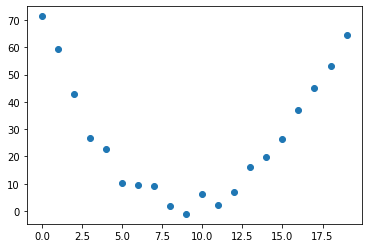

In [30]:
# fake some random speed measurement
time = torch.arange(0,20).float()
speed = torch.randn(20) * 3 + .75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [31]:
# create a quadratic function with input and params
def model(t, params):
    a, b, c = params
    return a*(t**2) + b*t + c

*Step 1: Initialize Parameters*

In [32]:
# we initialize our params randomly
params = torch.randn(3).requires_grad_()

*Step 2: Forward Pass / Make Predictions*

In [33]:
# calculate our predictions with our random weights
predictions = model(time, params)

In [34]:
# params grad is stimm empty
params.grad

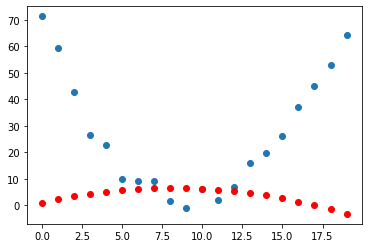

In [35]:
show_predictions(predictions)

*Step 3: Calculate the loss*

In [36]:
loss = mse(predictions, speed)
loss

tensor(1122.6660, grad_fn=<MeanBackward0>)

*Step 4: Propagate the Loss backward*

In [37]:
# params still now gradient
params.grad

In [38]:
loss.backward()

In [39]:
# now gradients are updated
params.grad

tensor([-7433.7559,  -452.2057,   -45.5609])

*Step 5: Step the Weights (Update)*

In [40]:
# we update the weights with the learning rate
params.data -= 1e-5 * params.grad.data

# and reset the gradient
params.grad.zero_()

tensor([0., 0., 0.])

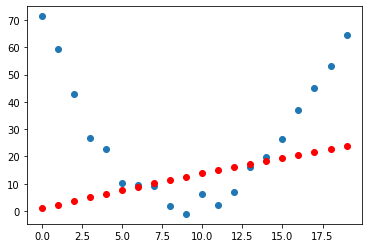

In [41]:
# now the model is better
predictions = model(time, params)
show_predictions(predictions)

In [42]:
# Repeat & Rinse:
# (Step 1: Initialize gradient calculation (requires grad))
# Step 2: Make predictions with forward pass 
predictions = model(time, params)
# Step 3: Calculate the loss
loss = mse(predictions, speed)
# Step 4: Calculate the grad by propagating the loss backward (backwards) 
loss.backward()
# Step 5: Update the Weights (Optimizer)
params.data -= 1e-5 * params.grad.data
params.grad.zero_()

tensor([0., 0., 0.])

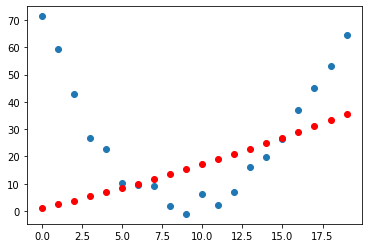

In [43]:
# now the model is better
predictions = model(time, params)
show_predictions(predictions)